<a href="https://colab.research.google.com/github/dkiriinya/financial_transactions_analysis/blob/main/Financial_Transaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Transaction Analysis for Personal Budget Optimization

**Name:** Don Gitonga Kiriinya
**Admission Number:** 25ZAD110434

## Introduction
This notebook aims to analyze personal financial transactions recorded over a three-month period. By understanding spending patterns and trends, this analysis can support better budgeting and reduce overspending.

## Problem Statement
Many individuals struggle with managing personal finances, often leading to overspending. Without visibility into spending patterns, it's difficult to make informed financial decisions. This project aims to uncover trends and insights that help improve personal budgeting.

## Brief Description
This project analyzes a CSV file containing categorized financial transactions over three months. The analysis focuses on understanding where money is being spent, how frequently, and whether there are opportunities to cut costs or reallocate budgets more effectively.

## Objectives
- Determine total and average spending by category.
- Identify daily and weekly expense patterns.
- Explore income vs. expense trends.
- Visualize spending to improve financial planning.
- Highlight potential areas of overspending.

## Project Implementation
The dataset will be cleaned, explored, and visualized using Python libraries such as Pandas, Matplotlib, and Seaborn. Key metrics and trends will be derived from the transaction data to provide actionable insights.

## Tools Used
- Pandas
- Matplotlib
- Seaborn
- NumPy
- Datetime

## Data Organization and Presentation
Data will be presented as:
- Cleaned and structured tables
- Aggregated summaries
- Visual plots

## Analysis Process
1. Load and inspect data
2. Clean and format data
3. Perform exploratory analysis
4. Visualize trends
5. Summarize insights

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("transactions_cleaned.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.drop(columns=['Goal', 'Description'], inplace=True)

# Filter expenses excluding 'Transfer'
expenses_df = df[(df['Amount'] < 0) & (df['Category'] != 'Transfer')].copy()
expenses_df['Amount'] = expenses_df['Amount'].abs()

# Filter income
income_df = df[df['Amount'] > 0].copy()

### Total Spending by Category

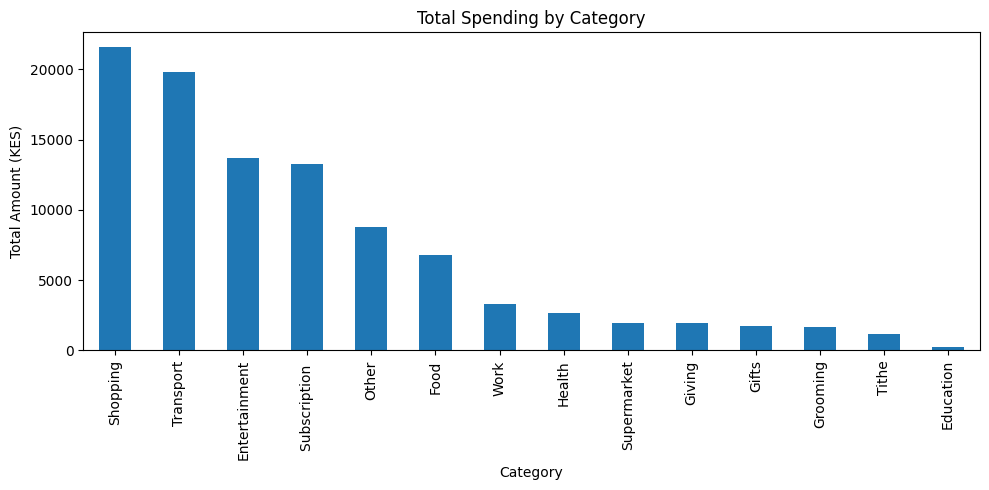

In [ ]:
category_total = expenses_df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_total.plot(kind='bar', figsize=(10,5), title='Total Spending by Category')
plt.ylabel('Total Amount (KES)')
plt.tight_layout()
plt.show()

### Daily Spending Over Time

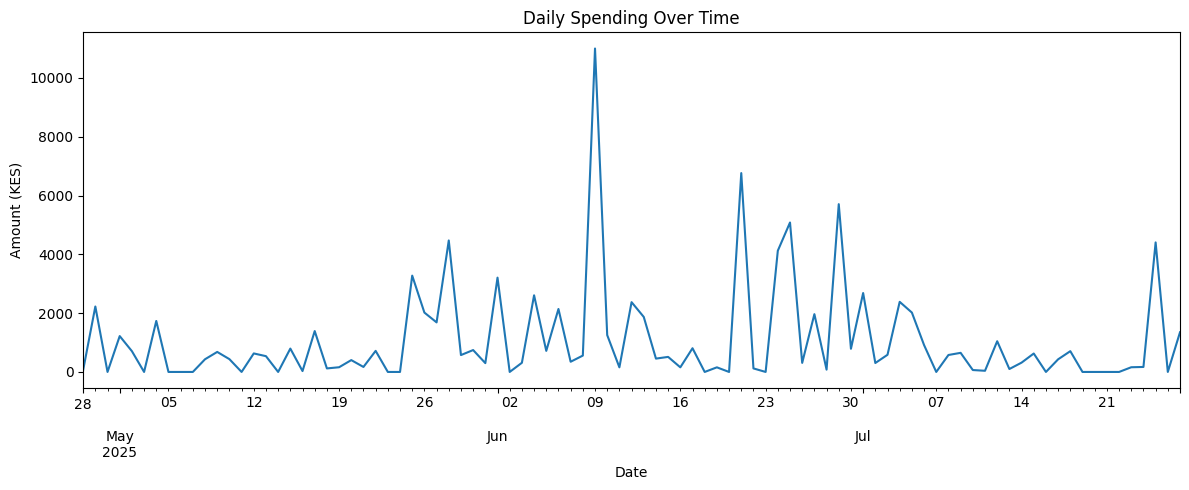

In [ ]:
expenses_df.set_index('Date')['Amount'].resample('D').sum().plot(figsize=(12,5), title='Daily Spending Over Time')
plt.ylabel('Amount (KES)')
plt.tight_layout()
plt.show()

### Descriptive Statistics by Category

In [ ]:
category_stats = expenses_df.groupby('Category')['Amount'].describe()
print(category_stats)

               count         mean          std      min        25%       50%  \
Category                                                                       
Education        1.0   250.000000          NaN   250.00   250.0000   250.000   
Entertainment   14.0   980.571429   545.775907   400.00   691.2500   824.000   
Food            26.0   261.461538   336.620288    40.00    66.2500   138.500   
Gifts            4.0   428.000000   374.627815   157.00   189.2500   292.500   
Giving           9.0   215.222222   165.323756    70.00   100.0000   110.000   
Grooming         4.0   421.750000    14.500000   400.00   421.7500   429.000   
Health           1.0  2650.000000          NaN  2650.00  2650.0000  2650.000   
Other            9.0   975.888889  1634.369025    20.00    40.0000   420.000   
Shopping        10.0  2156.300000  3110.638700   180.00   526.7500   900.000   
Subscription    15.0   885.568000  1148.821771    50.00    99.0000   250.000   
Supermarket      8.0   242.125000   215.

### Weekly Spending Trends

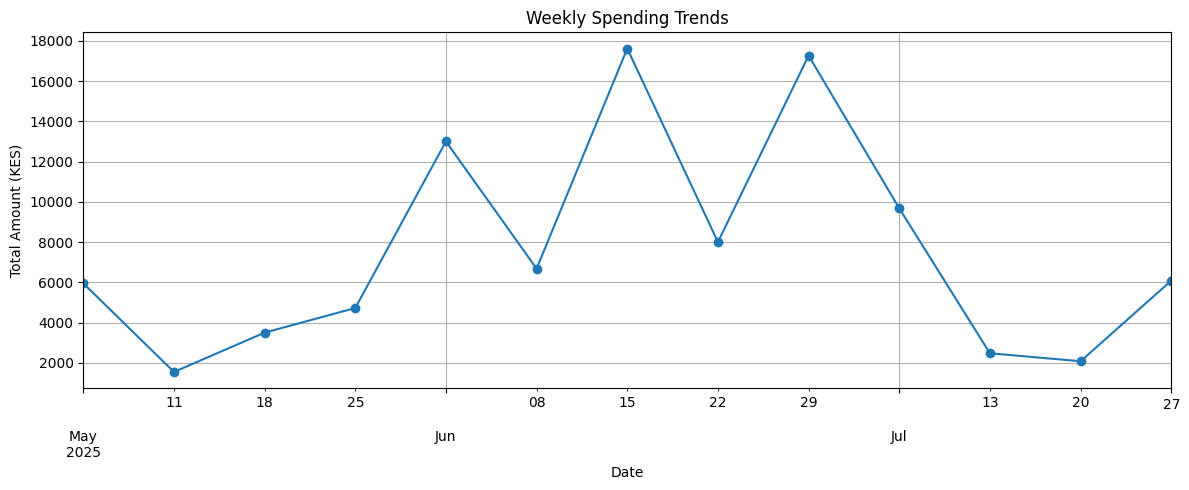

In [ ]:
weekly = expenses_df.set_index('Date').resample('W')['Amount'].sum()
weekly.plot(kind='line', marker='o', figsize=(12,5), title='Weekly Spending Trends')
plt.ylabel('Total Amount (KES)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Income vs Expenses Trends

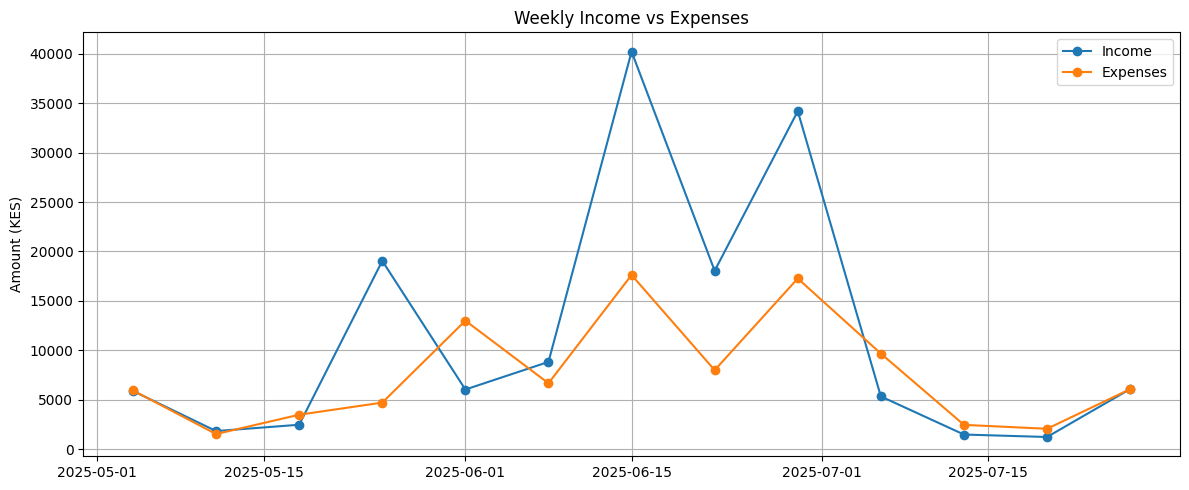

In [ ]:
weekly_expense = expenses_df.set_index('Date').resample('W')['Amount'].sum()
weekly_income = income_df.set_index('Date').resample('W')['Amount'].sum()

plt.figure(figsize=(12,5))
plt.plot(weekly_income.index, weekly_income.values, label='Income', marker='o')
plt.plot(weekly_expense.index, weekly_expense.values, label='Expenses', marker='o')
plt.title('Weekly Income vs Expenses')
plt.legend()
plt.ylabel('Amount (KES)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Attainment of Objectives
All objectives were met through visual and descriptive analysis.

## Implementation Challenges
- Missing subcategory, goal, and description data.
- Currency assumed consistent (KES).

## Resolutions
- Dropped unused columns.
- Focused analysis on available fields.

## Conclusions
Spending is concentrated in a few major categories. Weekly and daily spending trends reveal consistent habits with occasional spikes.

## Recommendations
- Set budgets for major categories.
- Track weekly expenses.
- Align income and spending.
- Enhance data quality (e.g., subcategories).

## Future of the Project
- Forecast future spending.
- Integrate budgeting goals.
- Build a live dashboard.